<a href="https://colab.research.google.com/github/AlmaRosa13/Metodos_Numericos/blob/main/Cap4_Interpolaci%C3%B3n%26Aproximaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

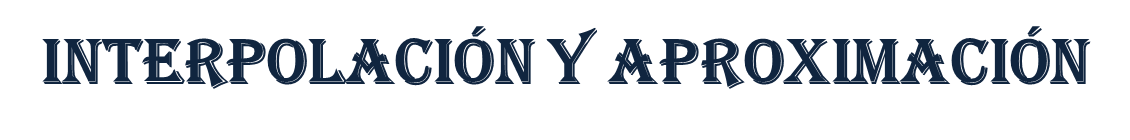

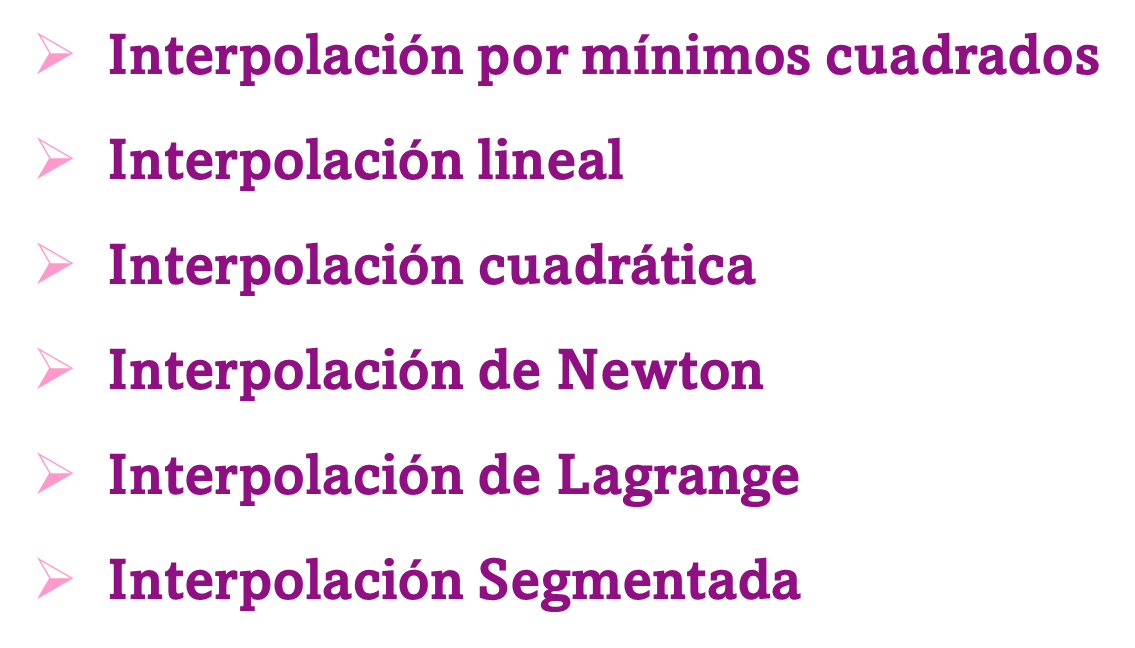

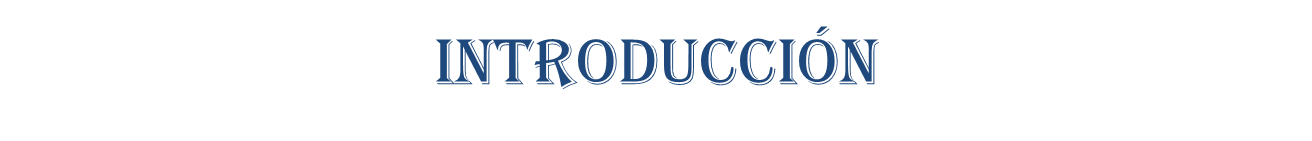

El resultado de observaciones de un proceso de laboratorio o industrial genera una lista de datos que forman tablas.

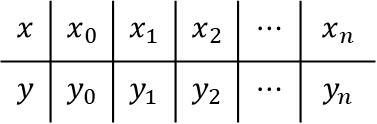

Por ejemplo, la medición de la densidad del carbonato de sodio a distintas concentraciones a temperatura constante genera los siguientes datos.

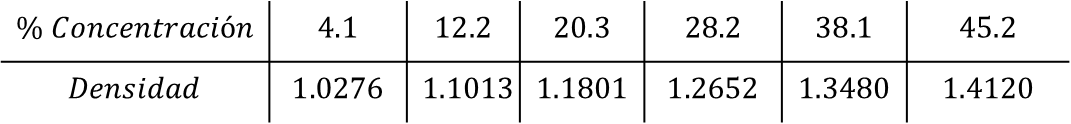

Los datos expresan la relación de la densidad (variable dependiente) y la concentración (variable independiente). Es decir que el valor de y depende del valor de $x$. Si deseamos conocer el valor de la variable dependiente para un valor de la variable independiente que no está en la tabla de datos, se requiere hacer una estimación. \\

La estimación puede lograrse de dos maneras, ajustando una función que toque todos los puntos de la tabla (interpolación) o ajustando una función que minimice las distancias del punto tabulado a la función (regresión). \\

La función de la interpolación pasa por cada punto de la tabla, la función de la regresión no necesariamente pasa lo más cerca de los puntos. Esto es, si sustituimos $x_i$ en $f(x)$, el resultado es $y_i$ para la interpolación y para la regresión obtenemos $y_i$ corregida.


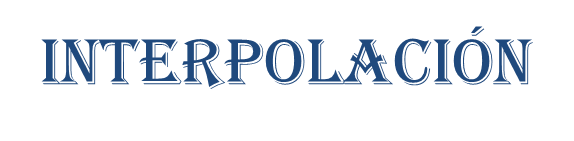

El objetivo es ajustar una función que por combinaciones lineales logre pasar por todos los puntos.

Definición—***Interpolación***. Las técnicas de interpolación ajustan un polinomio de menor grado que pasa por los puntos tabulados, esto quiere decir que, si sustituimos un valor de $x_i$  de la tabla, obtenemos la correspondiente $y_i$  de la tabla. \\

En general, la función tiene la forma:
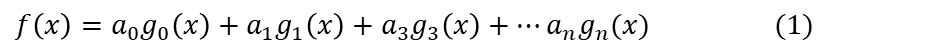

Donde las $a_i$  son factores a determinar y las $g_i(x)$ son funciones de una familia en particular. \\


**Familia de monomios**. Son los más utilizados ya que son fáciles de obtener y generan un polinomio. La desventaja es que los polinomios tienen comportamientos diferentes a los esperados, de acuerdo con los datos, cuando son de potencias altas: \\

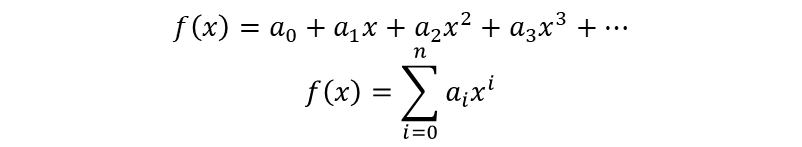

**Familia de funciones de Fourier:** 1, $sin⁡(x)$, $cos⁡(x)$, $sin⁡(2x)$ que al combinarse linealmente como en la ecuación 2.1 tenemos:

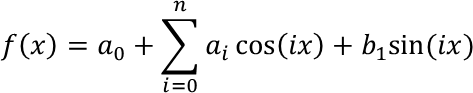

**Familia de funciones exponenciales:** 1, $e^x$, $e^2x$, $e^3x$  que al llevarla a la forma general de la ecuación 1 se tiene:

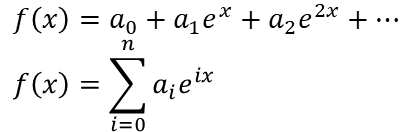

La técnica de ajustar un polinomio a los datos es la más usada porque se adapta a muchos casos simples, las otras técnicas se usan para un conjunto de datos que tienen un comportamiento cíclico o exponencial.


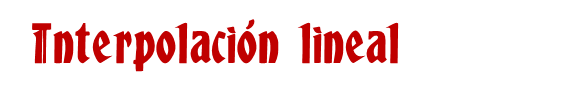

La interpolación lineal ajusta un polinomio de grado 1 a los datos tabulados. Usamos entonces la forma de una ecuación lineal \\
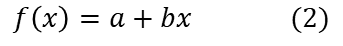

Para lograr una interpolación lineal (polinomio de grado 1), se requieren dos puntos de la tabla \\

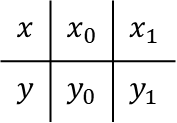

Como indica la definición se debe encontrar un polinomio que pase por los puntos tabulados. Entonces, si sustituimos $x_0$ en $f(x)$ (Ecuación lineal 2) debemos obtener $y_0$.

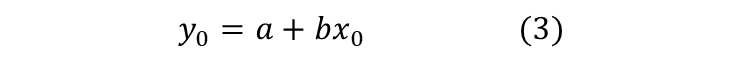

Y, si sustituimos $x_1$  en la ecuación 2, entonces deberíamos obtener $y_1$

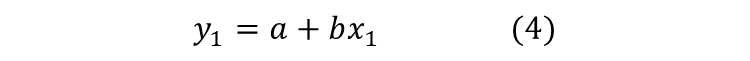

Tenemos dos ecuaciones (3 y 4) y dos incógnitas (a y b), entonces procedemos a resolver el sistema de 2x2. \\

Despejamos $a$ de ecuación 3

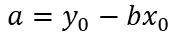                                    

Sustituimos $a$ en $y_1$

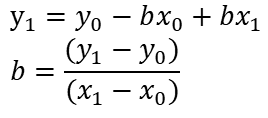

Sustituimos $a$ en ecuación 2

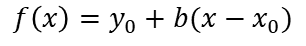

Finalmente sustituimos $b$ en la ecuación anterior

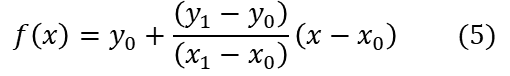

La ecuación 5 se usa para hacer la interpolación lineal en el intervalo $𝑥𝜖[x_0,x_1]$, $x$ es el valor que se desea interpolar. En general, para un par de puntos $[x_i,y_i]$; $[x_{i+1}$,$y_{i+1}]$ la ecuación sería

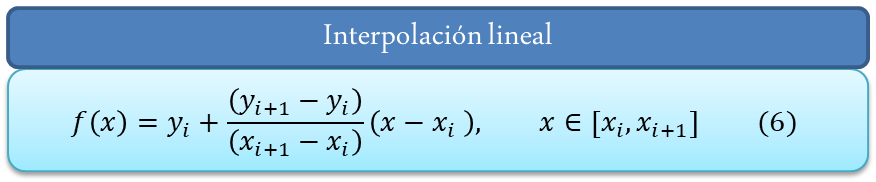


Ejemplo 4.1 — Interpolación lineal carbonato de sodio. La medición de la densidad del carbonato de sodio a distintas concentraciones a temperatura constante genera los siguientes datos.

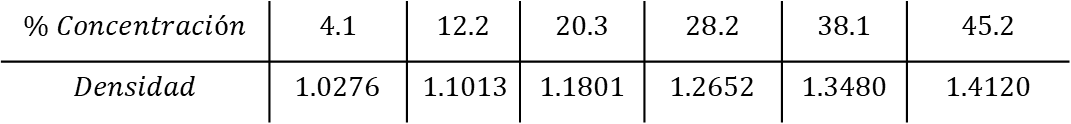

Obtener la densidad del carbonato de sodio a una concentración del 15%.
Observamos que la densidad del carbonato de sodio para una concentración del 15% no existe en los datos tabulados, también observamos que los datos más cercanos son

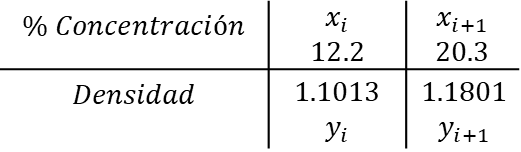

Sustituimos los valores correspondientes en la ecuación anterior donde $x=15$ (dato a interpolar)

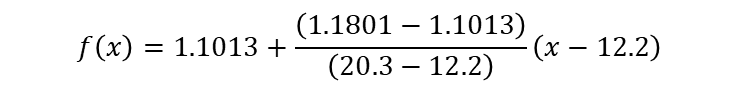

Esta ecuación es válida solo para $𝑥∈[12.2,20.3]$ fuera de ese intervalo no estaríamos hablando de una interpolación. Sustituimos entonces el valor de $x=15$

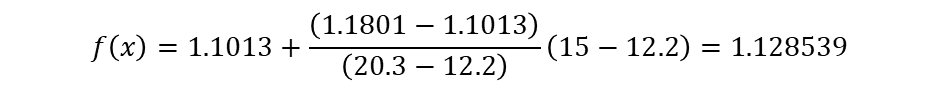

Por lo tanto, de acuerdo con la interpolación lineal, la densidad del carbonato de sodio al $15%$ de concentración es $1.128539$.

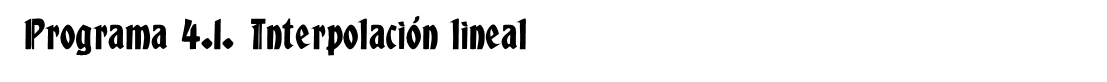

Observamos que el dato interpolado forma parte de la línea recta que une los puntos [12.2,1.1013] y [20.3,1.1801]
y el dato interpolado 15 ∈ [12.2,20.3]


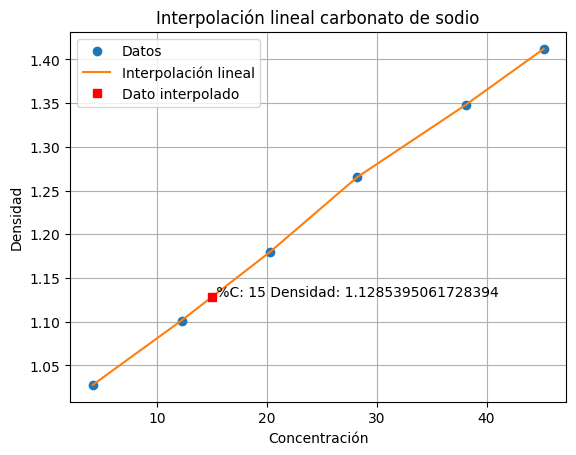

In [20]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x=np.array([4.1,12.2,20.3,28.2,38.1,45.2])
y=np.array([1.0276,1.1013,1.1801,1.2652,1.3480,1.4120])

xfino=np.linspace(4.1,45.2,100)
yi=interpolate.interp1d(x,y,kind='linear')

xi=15
yii=yi(xi)

plt.plot(x,y,'o',xfino,yi(xfino),'-',xi ,yii,'sr')
plt.legend(['Datos', 'Interpolación lineal', 'Dato interpolado'])
plt.title('Interpolación lineal carbonato de sodio')
plt.xlabel('Concentración')
plt.ylabel('Densidad')
plt.text(xi,yii,' %C: '+ str(xi) + ' Densidad: ' + str(yii))
print('Observamos que el dato interpolado forma parte de la línea recta que une los puntos [12.2,1.1013] y [20.3,1.1801]')
print('y el dato interpolado 15 ∈ [12.2,20.3]')
plt.grid(True)
plt.show()

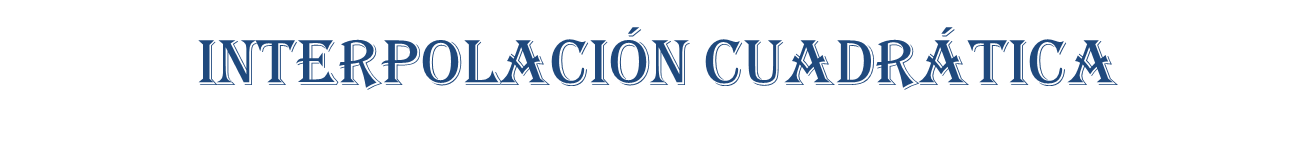

La interpolación lineal supone un comportamiento lineal entre $y_i$ y $y_{i+1}$ y esto no es necesariamente así, para los casos donde suponemos un comportamiento cuadrático se debe ajustar un polinomio de segundo grado que pase por los puntos. Si tomamos sólo dos puntos, entre ellos puede pasar un número infinito de polinomios de grado 2. La interpolación exige que el polinomio que une los puntos sea único y de menor grado, entonces se requieren 3 puntos para cumplir esta restricción.

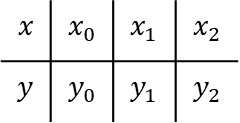

Similar a la interpolación lineal donde ajustamos un polinomio de primer grado, ahora ajustamos un polinomio de segundo grado a los puntos tabulados, el
polinomio debe pasar por los tres puntos, por lo que el polinomio es único.

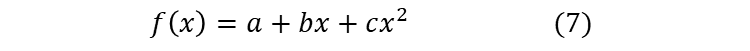

Si sustituimos $x_i$ en la ecuación 2.7 se debe obtener $y_i$

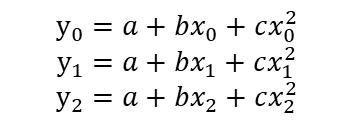

Tenemos un sistema de tres ecuaciones con tres incógnitas (a,b,c). La forma de la ecuación 2.7 nos lleva a resolver un sistema de 3x3, si pensamos en una interpolación cúbica tendríamos que resolver un sistema de 4x4, y si pensamos en una interpolación de grado $n$, entonces tendríamos que resolver un sistema $(n+1)x(n+1)$, lo cual no es conveniente. Trabajemos con una ecuación similar a la ecuación 2.7 que tome en cuenta pasar por los tres puntos $(x0,y0)$; $(x1,y1), (x2,y2)

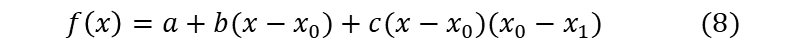

Debemos lograr que la ecuación 2.8 pase por los tres puntos, entonces si sustituimos $x_0$ debemos obtener $y_0$.

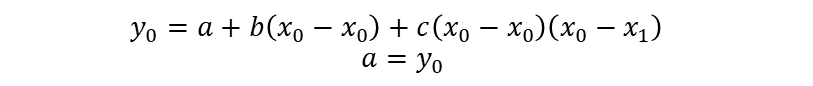

Si sustituimos $x_1$ debemos obtener $y_1$, sabemos ya que $a=y_0$

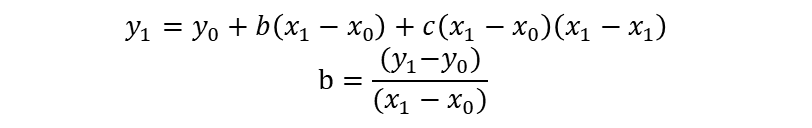

Ya sabíamos los valores de estos términos $a$ y $b$ por la interpolación lineal, ahora sustituimos $x_2$ para obtener $y_2$, sustituyendo también los valores obtenidos de $a$ y $b$.

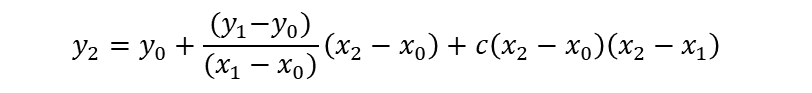

Despejando $c$ ya tenemos los tres coeficientes que necesitamos para la ecuación 2.8, pero lo vamos a hacer de tal manera que los términos queden expresados al final como diferencias divididas. \\

Despejamos el último término donde se encuentra $c$

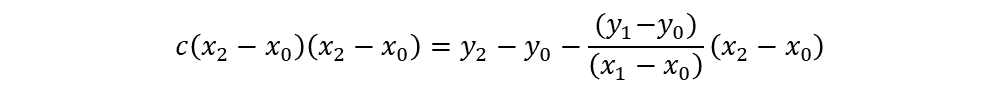

Sumamos un cero del lado derecho $-y_1+y_1$

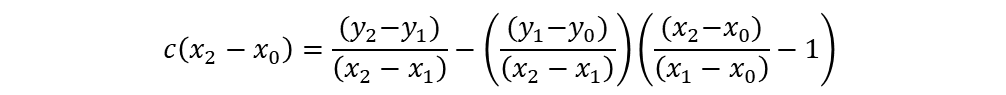

El término 1 lo sustituimos por otro $(𝑥_1−𝑥_0)/(𝑥_1−𝑥_0)$

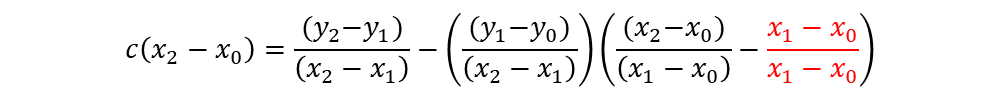

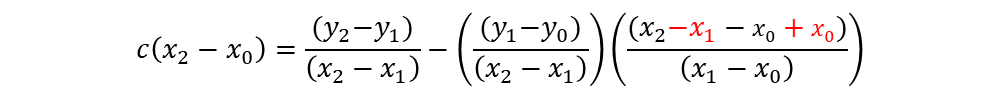

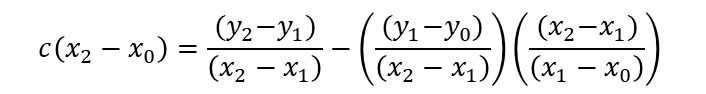

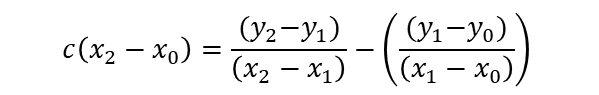

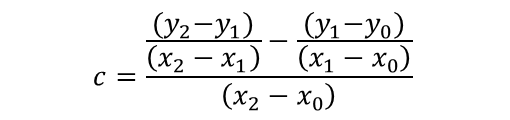

Por último, sustituimos $a$, $b$ y $c$ en la ecuación 2.8 para obtener la ecuación de la **interpolación cuadrática**.

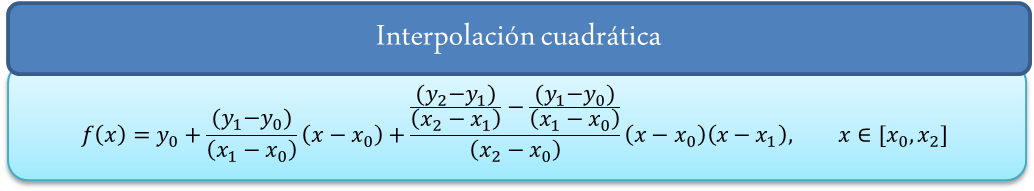

Los dos primeros términos son iguales a la interpolación lineal, el tercer término es el término cuadrático que da la curvatura entre los puntos de la tabla. El segundo término expresa la pendiente del comportamiento lineal, que es la “derivada” expresada como una diferencia dividida, y el tercer término es una diferencia de diferencias, es decir, la segunda derivada. Es precisamente como está construida la serie de Taylor de la ecuación 1.7.

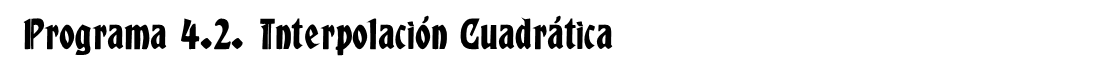

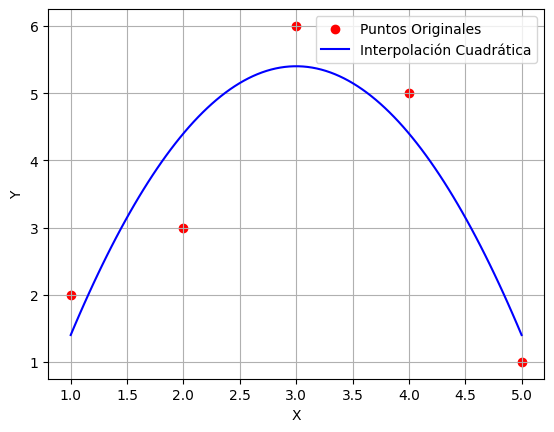

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 6, 5, 1])

# Realizar interpolación cuadrática
coefficients = np.polyfit(x, y, 2)  # Ajustar una función cuadrática (polinomio de grado 2)

# Crear una función cuadrática a partir de los coeficientes
quadratic_function = np.poly1d(coefficients)

# Generar puntos para la curva de interpolación
x_interp = np.linspace(min(x), max(x), 100)
y_interp = quadratic_function(x_interp)

# Graficar los puntos originales y la interpolación cuadrática
plt.scatter(x, y, label="Puntos Originales", color='red')
plt.plot(x_interp, y_interp, label="Interpolación Cuadrática", color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


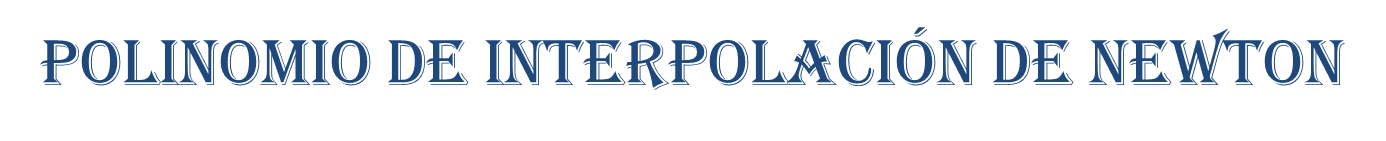

Como observamos en la interpolación lineal (ecuación 2.2) y la interpolación cuadrática (ecuación 2.9) cada término que se va aumentando es una diferencia dividida de orden mayor. El polinomio de interpolación polinómica para $n$ datos tiene la forma:
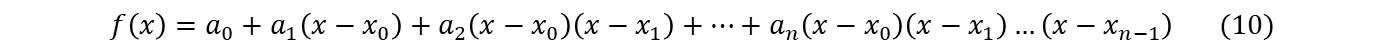

Donde

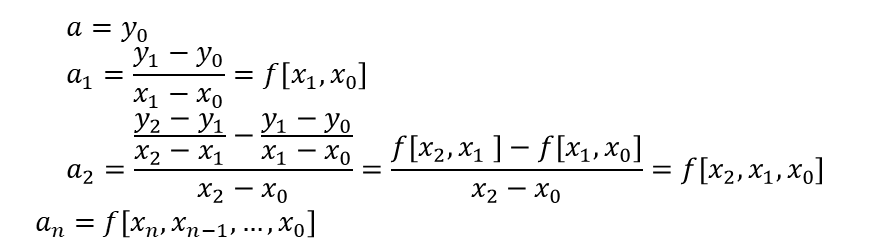

sustituyendo las diferencias en la ecuación 2.10 obtenemos

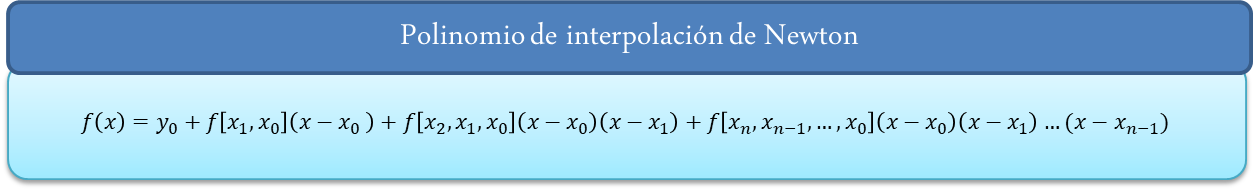

donde $f[x_1,x_0], f[x_2,x_1,x_0], f[x_n,x_{n-1},...,x_0]$ son las diferencias divididas. Para calcular la segunda diferencia $(f[x_2,x_1]-f[x_1,x_0])/(x_2-x_1)$ se usa el valor de la primera diferencia $f[x_1,x_0]$ la cual fue calculada anteriormente, entonces para hacer un cálculo eficiente, necesitamos usar el resultado de la primera diferencia en la segunda diferencia para no volver a calcularlo. Se construye entonces la tabla de diferencias (Cuadro 2.1).


La tabla de diferencias contiene todos los valores para construir el polinomio de interpolación.

# **Ejemplo 2.2 —** *Interpolación polinómica de Newton*. En temporada de lluvias se toma la profundidad del agua en una presa, obteniendo los siguientes datos:

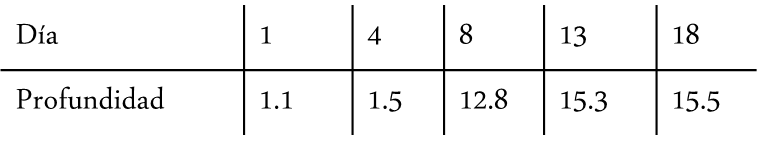

Calcular la profundidad del agua en el día 3. \\

**Solución.-** Usar la interpolación polinómica de Newton con todos los puntos de la tabla.


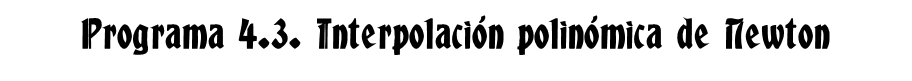

[[ 1.10000000e+00  1.33333333e-01  3.84523810e-01 -5.35714286e-02
   4.04341737e-03]
 [ 1.50000000e+00  2.82500000e+00 -2.58333333e-01  1.51666667e-02
   0.00000000e+00]
 [ 1.28000000e+01  5.00000000e-01 -4.60000000e-02  0.00000000e+00
   0.00000000e+00]
 [ 1.53000000e+01  4.00000000e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.55000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
-0.3424369747899161
La salida nos muestra el resultado de la interpolación, la profundidad es
-0.3424, es obvio que no es el resultado esperado de acuerdo con el contexto
del problema, la altura del agua no puede ser negativa; sin embargo, es el
resultado de ajustar un polinomio con todos los datos de la tabla.


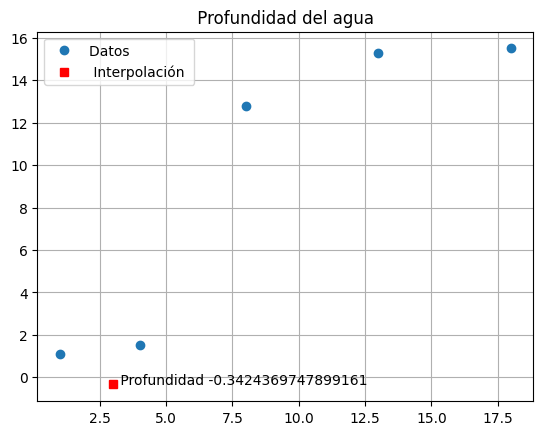

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,4,8,13,18])
y=np.array([1.1,1.5,12.8,15.3,15.5])
n=x.size

t=np.zeros((n,n))
t[:,0]= y

# Genera la tabla de diferencias
for c in range(1,n):
    for r in range(0,n-c):
        t[r,c]=(t[r+1,c-1]-t[r,c-1])/(x[r+c]-x[r])
print(t)

# calcula la interpolacion de xi
xi=3
xt=1
yi=t[0,0]

for k in range(0,n-1) :
    xt = xt*(xi-x[k])
    yi = yi+t[0,k+1]*xt

print(yi)

plt.plot(x,y,'o')
plt.plot(xi,yi,'sr')
plt.text(xi+0.1,yi,' Profundidad ' + str (yi))
plt.title(' Profundidad del agua ')
plt.legend(['Datos ',' Interpolación '])
plt.grid(True)

print('La salida nos muestra el resultado de la interpolación, la profundidad es')
print('-0.3424, es obvio que no es el resultado esperado de acuerdo con el contexto')
print('del problema, la altura del agua no puede ser negativa; sin embargo, es el')
print('resultado de ajustar un polinomio con todos los datos de la tabla.')
plt.show()

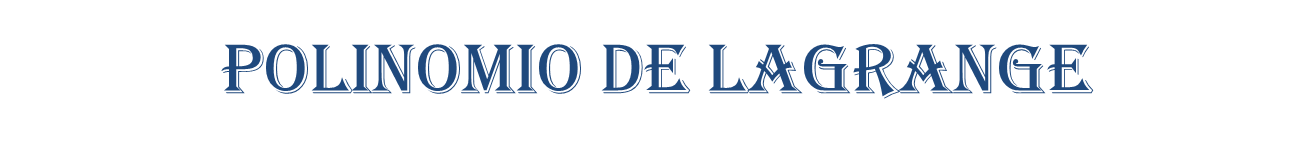

La interpolación de Lagrange ajusta un polinomio a los datos, de tal manera que pasa por cada uno.
Como lo precisan los métodos de interpolación, se trata de ajustar un polinomio de menor grado que toca todos los puntos y el polinomio es único. Como el polinomio es único, entonces tanto la interpolación de Newton como la interpolación de Lagrange obtienen el mismo polinomio, sólo que expresado de una manera diferente. Otra diferencia es que el polinomio de Lagrange obtiene el
polinomio en un solo paso, la interpolación de Newton primero obtiene la tabla de diferencias para construir el polinomio de interpolación. \\

La forma del polinomio que usa la interpolación lineal de Lagrange entre dos puntos es la siguiente:

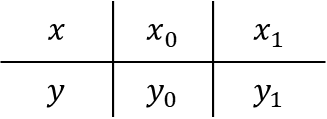

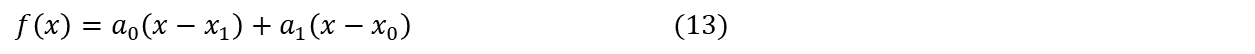

Como en los casos anteriores, para asegurar que el polinomio pasa por los puntos tabulados, si sustituimos $x_0$ en la ecuación 2.13 debemos obtener $y_0$

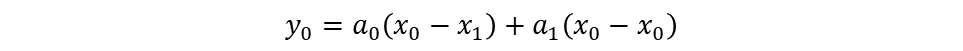

de aquí despejamos $a_0$

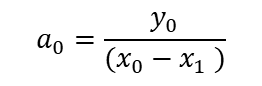

si sustituimos $x_1$ en la ecuación 2.13, debemos obtener $y_1$

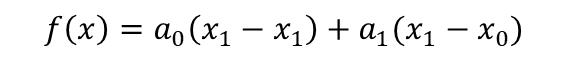

de aquí despejamos $a_1$

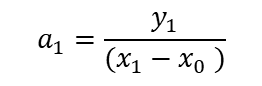


finalmente sustituimos $a_0$ y $a_1$ en la ecuación 2.13 para obtener

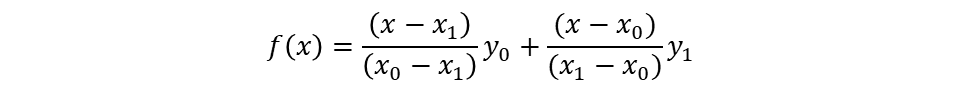

En la interpolación cuadrática o de segundo grado se ajusta un polinomio de grado 2 que pasa por los tres puntos:

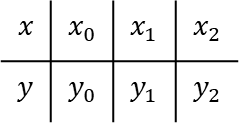

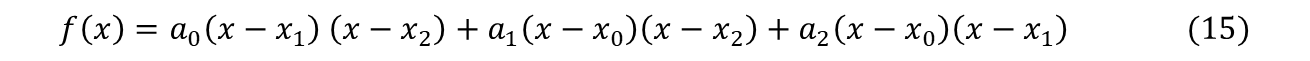


Para asegurar que el polinomio pasa por los tres puntos tabulados, sustituimos $x_0$ en la ecuación 2.15, debemos obtener $y_0$

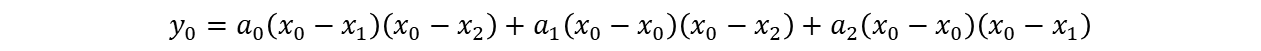

de aquí despejamos $a_0$

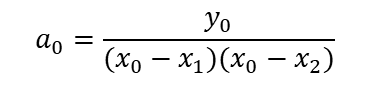

si sustituimos $x_1$ en la ecuación 2.15, debemos obtener $y_1$

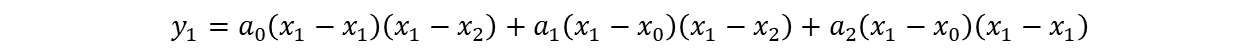

de aquí despejamos $a_1$

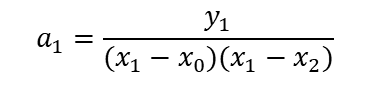

Sustituimos $x_2$ en la ecuación 2.15, debemos obtener $y_2$

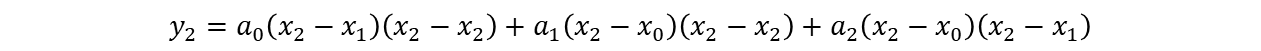

de aquí despejamos $a_2$

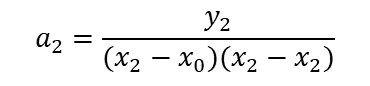

finalmente, sustituimos $a_0$, $a_1$ y $a_2$ en la ecuación 2.15 para obtener la ecuación de la interpolación de Lagrange de segundo grado.

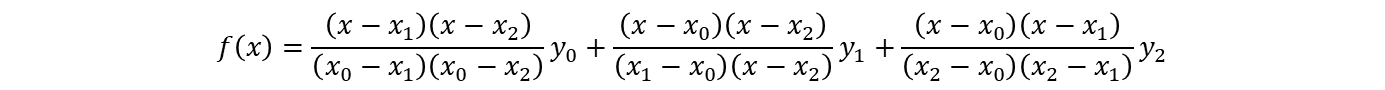

La construcción de la interpolación polinómica de Newton para $n$ puntos, observando el comportamiento de la interpolación lineal y cuadrática anteriores (ecuaciones 2.13 y 2.15) podemos deducir que:

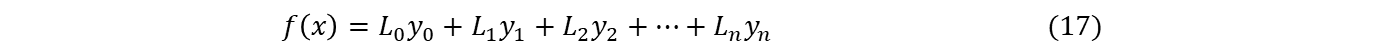


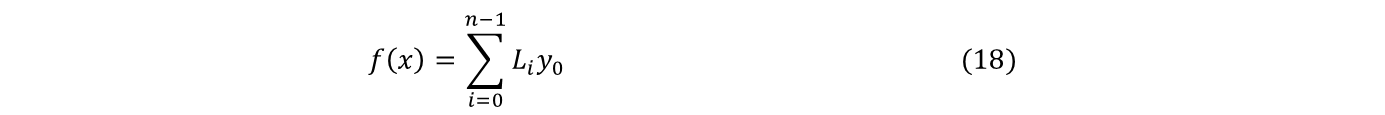

Donde las $L_i$ son los factores de Lagrange que se calculan como:

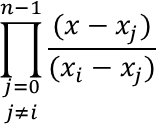

La ecuación de la interpolación polinómica de Lagrange es:

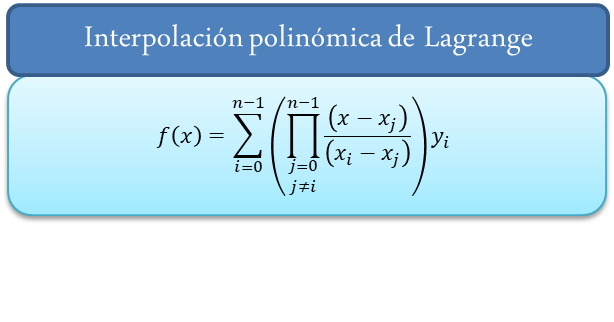

Hay que recordar que, tanto la interpolación polinómica de Newton como la interpolación polinómica de Lagrange, ambas obtienen el mismo polinomio de interpolación, sólo que se expresan y se obtienen de maneras diferentes, pero algebraicamente son el mismo polinomio y, por lo tanto, se tienen los mismos resultados.

# **Ejemplo 4.3 —** *Interpolación polinómica de Lagrange.* En temporada de lluvias se toma la profundidad del agua en una presa, obteniendo los siguientes datos:

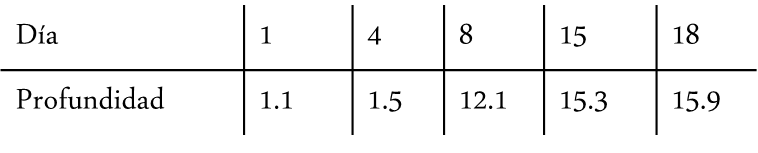

Calcular la profundidad del agua en el día 3. \\

**Solución** \\
Usemos la interpolación polinómica de Newton con todos los puntos de la tabla

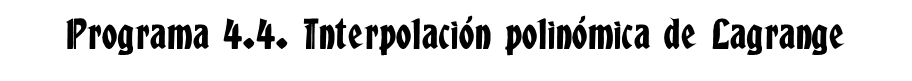

-0.34243697478991597
-0.3424369747899192


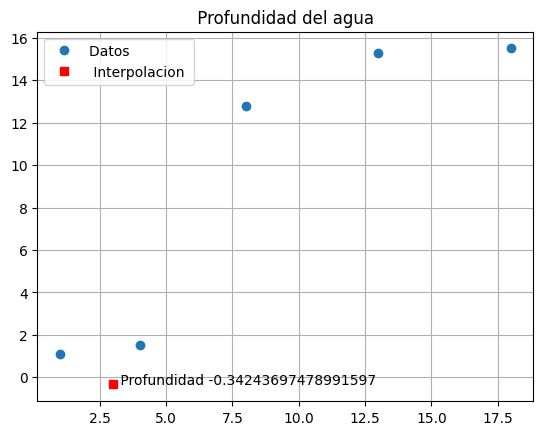

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

x=np.array([1,4,8,13,18])
y=np.array([1.1,1.5,12.8,15.3,15.5])
n=x.size
xi=3
yi=0
# Calcula los factores de Lagrange y hace la suma
for i in range(0,n):
    producto = y[i]
    for j in range(0,n):
      if i!= j:
          producto = producto * (xi - x[j]) /(x[i]-x[j]);
    yi = yi + producto

print(yi)
f= interpolate.lagrange(x,y) # usando la funcion de Lagrange de scipy
print(f(xi))

plt.plot(x,y, 'o')
plt.plot(xi ,yi , 'sr ')
plt.text(xi +0.1 ,yi , ' Profundidad ' + str (yi))
plt.title( ' Profundidad del agua ')
plt.legend([ 'Datos ',' Interpolacion '])
plt.grid( True )
plt.show()